In [22]:
#Version del algoritmo Quicksort: esquema de particion de Lomuto.
#Eliminamos la recursión final, convirtiendolo en un proceso iterativo
from math import dist; 
import time;
import random;
import matplotlib.pyplot as plt;


In [23]:
    
#Escogemos un pivote y lo ubico en su posicion correspondiente
#de un segmento
#Particion de Lomuto

def partition(A, lo, hi, ref):
    pivot = A[hi]
    i = lo 
    
    for j in range(lo,hi):
        if dist(A[j],ref) < dist(pivot,ref):
            
            A[i], A[j] = A[j], A[i]
            i = i+1
        
    A[i], A[hi] =A[hi], A[i]
    
    return i
    


In [24]:
#Quicksort original
def quicksort(A, lo, hi,ref):
    
    if lo >= hi or lo < 0: 
        return

    p = partition(A, lo, hi,ref)
    
    #Ordenar las dos particiones
    quicksort(A, lo, p-1,ref)
    quicksort(A, p+1, hi,ref)
    


In [25]:
#Quicksort modificado (iterativo)
def quicksort_m(A, lo, hi,ref):
    
    if lo >= hi or lo < 0: 
        return

    p = partition(A, lo, hi,ref)
    
    #Ordenar las dos particiones
    quicksort_m(A, lo, p-1,ref)
    
    #quicksort(A, p+1, hi) Se elimina
    
    sinOrden = []
    lo = p+1
    sinOrden.append((lo,hi)) #Indice final e inicial de la lista que queda sin ordenar
    while len(sinOrden)>0: #Mientras la lista este llena, quedan partes por ordenar
        lo, hi = sinOrden.pop() #Coge el último elemento de la lista
        
        pivot = partition(A, lo, hi,ref)

        #Metemos la parte izquierda sin ordenar 
        if pivot > lo +1:
            sinOrden.append((lo, pivot -1))
        #Y tambien la parte derecha del pivote
        if pivot < hi-1:
            sinOrden.append((pivot+1, hi))
        
    


In [26]:
#Genera un vector de tamaño n con puntos (x,y) aleatorios  
   
def generarVector(n):
    A=[]
    
    #n = 100000
    for i in range(0,n-1):
        x = random.randint(0,30)
        y = random.randint(0,30)
        A.append((x,y))
    return A
    


In [36]:
#n: tamaño maximo del vector
#k: saltos de los tamaños del vector
def ejecucion(n,k): 

    ref =(0,0) #Punto de referencia

    tiemposMod=[]
    tiempos=[]

    for i in range(0,n,k):
        A= generarVector(i)
        B = A.copy()
        C = A.copy()
        inicioM = time.time()
        quicksort_m(C, 0 , len(C)-1,ref)
        finM = time.time()
        tiemposMod.append((finM-inicioM)*1000)
        
    
        
        inicio = time.time()
        quicksort(B,0, len(B)-1, ref)
        fin = time.time()
        tiempos.append((fin-inicio)*1000)

    i = range(0,n,k)
    plt.plot(i, tiempos, i,tiemposMod)

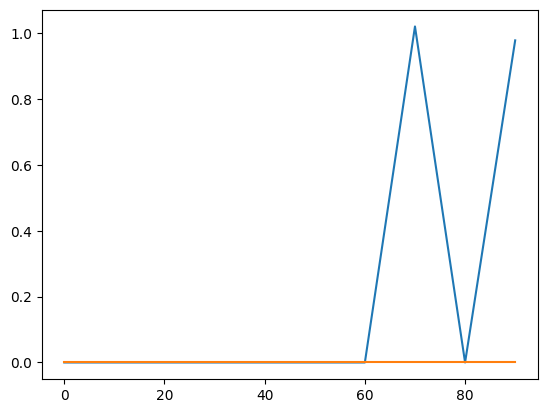

In [37]:
ejecucion(100,10)


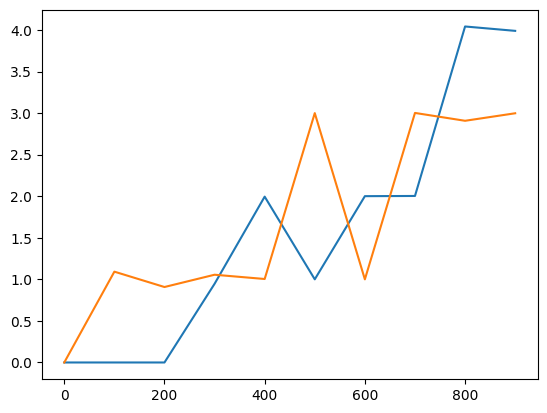

In [38]:
ejecucion(1000,100)

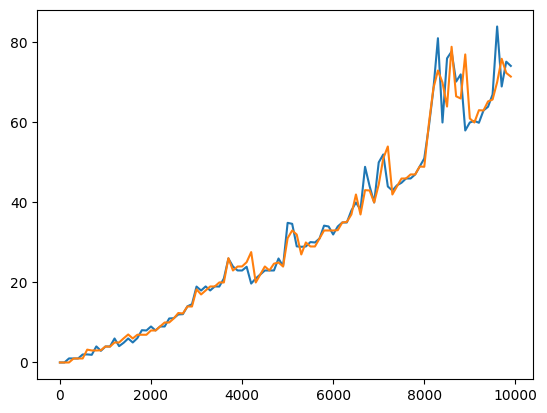

In [39]:
ejecucion(10000,100)

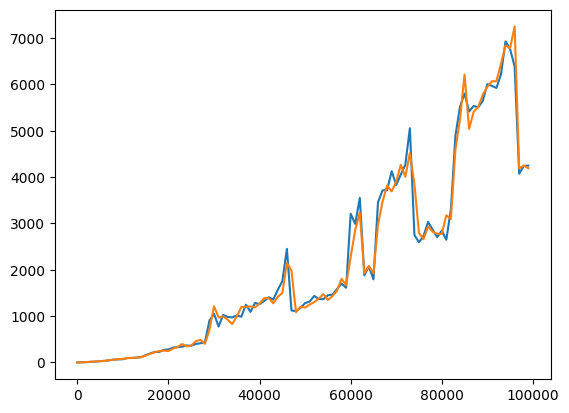

In [40]:
ejecucion(100000,1000)

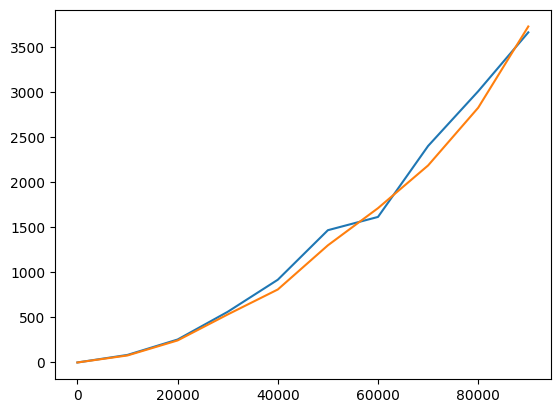

In [41]:
ejecucion(100000,10000)